# PHASE 2 PROJECT
## BUSINESS STAKEHOLDER
 The real estate agency 

## BUSINESS PROBLEM 
Homeowners, real estate professionals, and potential house buyers have difficulty in making informed decisions regarding property investments, to make this decision, understanding the factors influencing housing prices in a specific area is necessary.
## OBJECTIVES
REAL ESTATE AGENCY
- To predict prices of houses depending on the features.
- To identify the locations with the highest sales prices.
- To identify how seasonal trends affect sales.




In [38]:
import pandas as pd
data = pd.read_csv('kc_house_data.csv')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [79]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Null values
Looking at the information above we can see only three columns have missing values, that is; "waterfront", "view" and "yr_renovated". Every house has its own unique features and not all are the same. Some houses contain certain features while others lack them. Since this is real world data, we can account for missing values in "waterfront" and "view" columns by saying not all houses are build the same and those lacking the two features have caused our data on the two columns to be inconsitent with the rest of the other columns. The "yr_renovated" column can also be accounted for by saying not all houses undergo renovation. Houses build earlier might need renovation but recent houses do not require renovation hence the missing values in the column
 

In [40]:
# Using mode to impute missing values
# Python function to impute missing values

def replace_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode().iloc[0]  
    data[column_name].fillna(mode_value, inplace=True)

In [41]:
# columns to be imputed
replace_missing_with_mode(data,'view')
replace_missing_with_mode(data, 'waterfront')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [46]:
# Changing our date from object to datetime data type
data['date'] = pd.to_datetime(data['date'])

After checking for null values, we check for any duplicated values in the data.

In [47]:
# Checking for duplicated values in our data
data.duplicated().sum()

0

# Data visualization
Now we have checked for abnormalities in the data, we can go ahead and plot the data to explore the distribution, relationships and patterns in the data. This will also help us in identifying outliers and trends.
 

In [58]:
# Importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



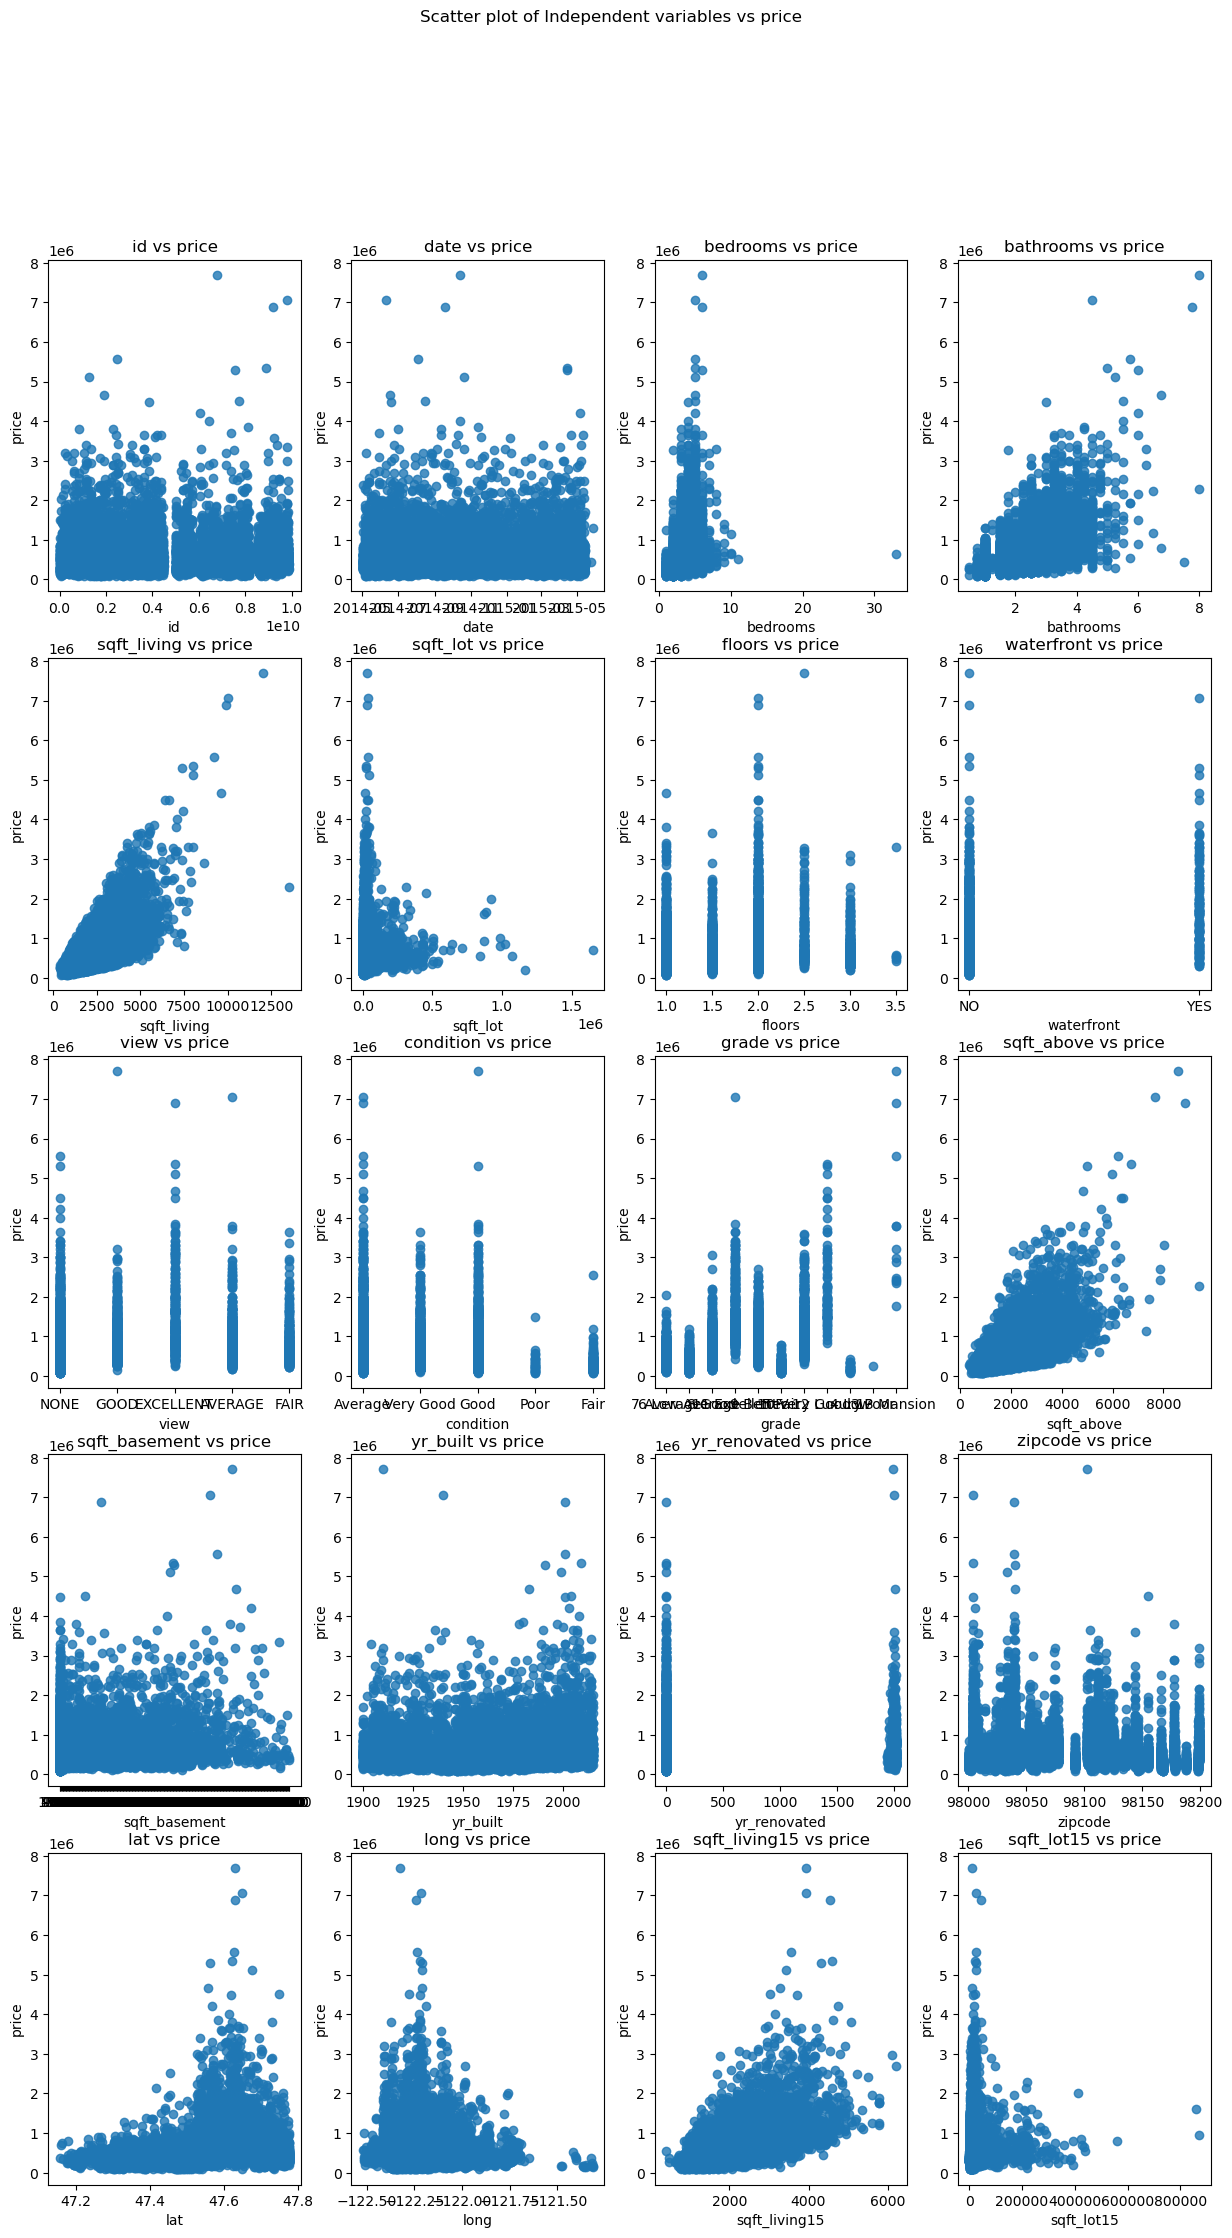

In [76]:
def scatter_plots(y, X):
    plots = X.shape[1]
    cols = 4
    rows = (plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle(f"Scatter plot of Independent variables vs {y.name}")

    for i, ax in enumerate(axes.flat):
        if i < plots:
            x_col_name = X.columns[i]
            ax.scatter(X.iloc[:, i], y, alpha=0.8)
            ax.set_xlabel(x_col_name)
            ax.set_ylabel(y.name)
            ax.set_title(f"{x_col_name} vs {y.name}")



# Run the function
scatter_plots(y, X)


## Relationship between our independent(constant variable price) and dependent variables
- 


In [93]:
# correlation 
columns_to_test = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15']

# computing the correlation matrix
import numpy as np
correlation_matrix = data[columns_to_test].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
one_sided_correlation = correlation_matrix.mask(mask)


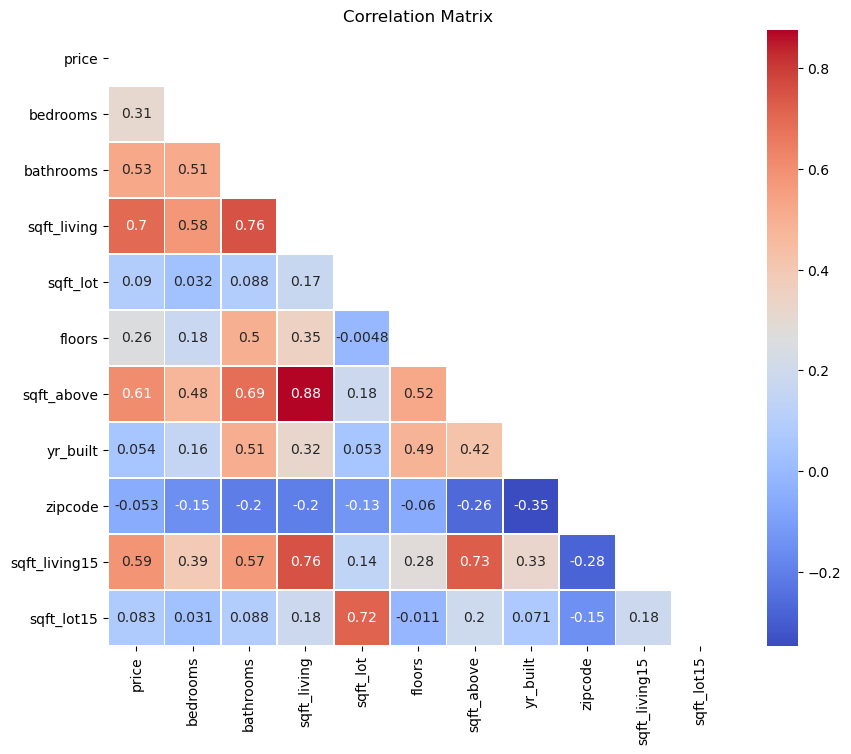

In [94]:
# using heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask = matrix)
plt.title(f'Correlation Matrix')
plt.show()

# Correlation results


In [ ]:
sqft living
yr __built
bathrooms
bedrooms
sqft above

-  scatter plots 
- Histograms
- box plot 

regression analysis
- impact of independent on the target

